## IA340 Project

## Team members: Nicolas Melendez, William Benson

Description of data: This data was retrieved from the City of New York and is all Motor Vehicle Crashes that were reported to police. Any crash that met the criteria of being reported (someone injurted or killed, excess of $1000 in damages) from 2019 to Oct. 11, 2024 is in this database.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('s3://vehiclecrashes.ia340/Motor_Vehicle_Collisions_-_Crashes.csv')
 #Display basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2125763 entries, 0 to 2125762
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [2]:
#Displaying the first few rows of my dataset
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [3]:
#Checking for missing values
(df.isnull().sum())

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           661104
ZIP CODE                          661364
LATITUDE                          252597
LONGITUDE                         252597
LOCATION                          252597
ON STREET NAME                    455112
CROSS STREET NAME                 810044
OFF STREET NAME                  1763024
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       7144
CONTRIBUTING FACTOR VEHICLE 2     333073
CONTRIBUTING FACTOR VEHICLE 3    1972957
CONTRIBUTING FACTOR VEHICLE 4    2091067
CONTRIBUTING FACTOR VEHICLE 5    2116325
COLLISION_ID                           0
VEHICLE TYPE COD

In [4]:
#Dropping rows with missing data
df_cleaned = df.dropna()

In [5]:
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           661104
ZIP CODE                          661364
LATITUDE                          252597
LONGITUDE                         252597
LOCATION                          252597
ON STREET NAME                    455112
CROSS STREET NAME                 810044
OFF STREET NAME                  1763024
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       7144
CONTRIBUTING FACTOR VEHICLE 2     333073
CONTRIBUTING FACTOR VEHICLE 3    1972957
CONTRIBUTING FACTOR VEHICLE 4    2091067
CONTRIBUTING FACTOR VEHICLE 5    2116325
COLLISION_ID                           0
VEHICLE TYPE COD

In [6]:
#Filling missing values with a place holder
df_filled = df.fillna(0)

In [7]:
# Check for duplicates
duplicates = df.duplicated().sum()

# Remove duplicates
df_no_duplicates = df.drop_duplicates()


In [22]:
# Finding the number of people killed in each borough
borough_killed = df.groupby('BOROUGH')['NUMBER OF PERSONS KILLED'].sum().reset_index()

# Check the grouped data
print(borough_killed)


         BOROUGH  NUMBER OF PERSONS KILLED
0          BRONX                     291.0
1       BROOKLYN                     648.0
2      MANHATTAN                     351.0
3         QUEENS                     545.0
4  STATEN ISLAND                      97.0


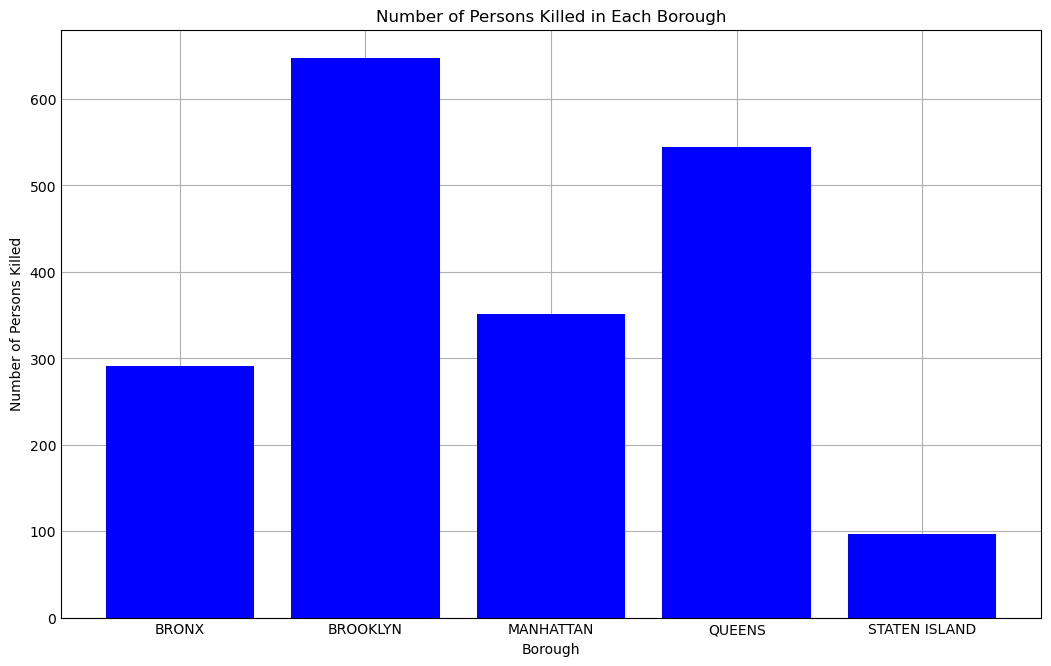

In [23]:
#Visualizing my finging
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10,6))
plt.bar(borough_killed['BOROUGH'], borough_killed['NUMBER OF PERSONS KILLED'], color='blue')

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Number of Persons Killed')
plt.title('Number of Persons Killed in Each Borough')

# Show the graph
plt.show()
